# Aditya Tripathi

In [13]:
import pandas as pd

fifa_data = pd.read_csv('/Users/adityatripathi/Desktop/University/DATA_301/Project/project-group24-project/FIFA-21 Complete.csv' , delimiter = ';')

print(fifa_data.head(3))


   player_id               name nationality  position  overall  age  hits  \
0     158023       Lionel Messi   Argentina  ST|CF|RW       94   33   299   
1      20801  Cristiano Ronaldo    Portugal     ST|LW       93   35   276   
2     190871          Neymar Jr      Brazil    CAM|LW       92   28   186   

   potential                  team  
0         94         FC Barcelona   
1         93             Juventus   
2         92  Paris Saint-Germain   


## Research question/interests

Briefly describe your research question or interests here.

Research question: How does the potential of a player effect it's overall ratings?

Initial hypothesis: Higher the potential the higher will be the overall ratings

# TASK 1 EDA

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [7]:
# Importing the data

df = pd.read_csv('/Users/adityatripathi/Desktop/University/DATA_301/Project/project-group24-project/notebooks/FIFA-21 Complete.csv'  , delimiter = ';')

In [8]:
# About the data

df.info()

df.shape # the dataset has 17981 rows and 9 columns

df.head(3)

df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    17981 non-null  int64 
 1   name         17981 non-null  object
 2   nationality  17981 non-null  object
 3   position     17981 non-null  object
 4   overall      17981 non-null  int64 
 5   age          17981 non-null  int64 
 6   hits         17981 non-null  int64 
 7   potential    17981 non-null  int64 
 8   team         17981 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.2+ MB


Index(['player_id', 'name', 'nationality', 'position', 'overall', 'age',
       'hits', 'potential', 'team'],
      dtype='object')

In [17]:
# Finding the corellation between the variables

# calculate correlation matrix
corr = df.corr()# plot the heatmap

print(corr)

            overall       age      hits  potential
overall    1.000000  0.341995  0.378900   0.638915
age        0.341995  1.000000 -0.073467  -0.374716
hits       0.378900 -0.073467  1.000000   0.429509
potential  0.638915 -0.374716  0.429509   1.000000


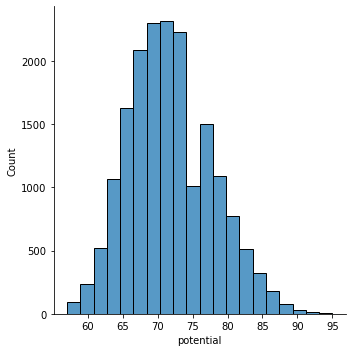

In [21]:
sns.displot(df['potential'], kde = False, bins=20)

# Most of the players have a potential in the range of 65 to 80

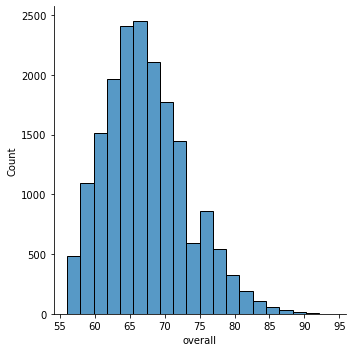

In [22]:
sns.displot(df['overall'], kde = False, bins=20)

# TASK 2 Analysis Pipeline

In [32]:
df1 = pd.read_csv('/Users/adityatripathi/Desktop/University/DATA_301/Project/project-group24-project/notebooks/FIFA-21 Complete.csv'  , delimiter = ';')

In [33]:
# Changing some data types to their appropriate types

# Setting categorical data

df1['nationality'] = df1['nationality'].astype('category')
df1['position'] = df1['position'].astype('category')
df1['team'] = df1['team'].astype('category')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   player_id    17981 non-null  int64   
 1   name         17981 non-null  object  
 2   nationality  17981 non-null  category
 3   position     17981 non-null  category
 4   overall      17981 non-null  int64   
 5   age          17981 non-null  int64   
 6   hits         17981 non-null  int64   
 7   potential    17981 non-null  int64   
 8   team         17981 non-null  category
dtypes: category(3), int64(5), object(1)
memory usage: 985.3+ KB


In [56]:
df = pd.read_csv('/Users/adityatripathi/Desktop/University/DATA_301/Project/project-group24-project/notebooks/FIFA-21 Complete.csv' , delimiter = ';')

     ##Loads and cleans data by removing redundancy, unused columns and null values
df1=(df.copy().drop(['player_id','team' , 'nationality'] , axis = 1) 
        .sort_values("overall", ascending = False)
        .reset_index(drop=True)
        )
conditions = [
    (df['overall'] > 85),
    (df['overall'] > 70) & (df['overall'] <= 85),
    (df['overall'] > 0) & (df['overall'] <= 70),]

values = ['Gold', 'Silver', 'Bronze']

df1['Rating'] = np.select(conditions, values)
df1

,name,position,overall,age,hits,potential,Rating
0,Lionel Messi,ST|CF|RW,94,33,299,94,Gold
1,Cristiano Ronaldo,ST|LW,93,35,276,93,Gold
2,Neymar Jr,CAM|LW,92,28,186,92,Gold
3,Virgil van Dijk,CB,91,29,127,92,Gold
4,Jan Oblak,GK,91,27,47,93,Gold
...,...,...,...,...,...,...,...
17976,Hassan Al Shamrani,CB|CDM,56,29,0,57,Bronze
17977,Erland Tangvik,GK,56,23,0,63,Bronze
17978,Ruvira,GK,56,20,0,70,Bronze
17979,Juan Camilo Suárez,CB,56,21,0,63,Bronze


# TASK 3 
## Method Chaining

In [39]:
import project_functions1 as p1

In [40]:
dfu = p1.unprocessed('/Users/adityatripathi/Desktop/University/DATA_301/Project/project-group24-project/notebooks/FIFA-21 Complete.csv')
dfu

,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid
...,...,...,...,...,...,...,...,...,...
17976,256093,Jaime Ortíz,Ecuador,ST,56,21,0,64,Sociedad Deportiva Aucas
17977,256088,Michael Carcelén,Ecuador,CM,56,23,0,64,Club Deportivo El Nacional
17978,256074,Davide Luzi,Venezuela,ST,56,18,1,68,Zamora Fútbol Club
17979,256073,Sergio Sulbarán,Venezuela,RW,56,22,0,62,Zamora Fútbol Club


In [24]:
import pandas as pd

import numpy as np

In [25]:
df = pd.read_csv('/Users/adityatripathi/Desktop/University/DATA_301/Project/project-group24-project/notebooks/FIFA-21 Complete.csv' , delimiter = ';')

     ##Loads and cleans data by removing redundancy, unused columns and null values
df1=(df.copy().drop(['player_id','team' , 'nationality'] , axis = 1) 
        .sort_values("overall", ascending = False)
        .reset_index(drop=True)
        )
conditions = [
    (df['overall'] > 85),
    (df['overall'] > 70) & (df['overall'] <= 85),
    (df['overall'] > 0) & (df['overall'] <= 70),]

values = ['Gold', 'Silver', 'Bronze']

df1['Rating'] = np.select(conditions, values)
df1

,name,position,overall,age,hits,potential,Rating
0,Lionel Messi,ST|CF|RW,94,33,299,94,Gold
1,Cristiano Ronaldo,ST|LW,93,35,276,93,Gold
2,Neymar Jr,CAM|LW,92,28,186,92,Gold
3,Virgil van Dijk,CB,91,29,127,92,Gold
4,Jan Oblak,GK,91,27,47,93,Gold
...,...,...,...,...,...,...,...
17976,Hassan Al Shamrani,CB|CDM,56,29,0,57,Bronze
17977,Erland Tangvik,GK,56,23,0,63,Bronze
17978,Ruvira,GK,56,20,0,70,Bronze
17979,Juan Camilo Suárez,CB,56,21,0,63,Bronze


# TASK 4

## Data Analysis

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Player Name  17981 non-null  object
 1   Position     17981 non-null  object
 2   Category     17981 non-null  int64 
 3   Age          17981 non-null  int64 
 4   Shots        17981 non-null  int64 
 5   Potential    17981 non-null  int64 
 6   Category     17981 non-null  object
dtypes: int64(4), object(3)
memory usage: 983.5+ KB


In [43]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Category,17981.0,67.274345,5.924392,56.0,63.0,67.0,71.0,94.0
Age,17981.0,26.311440,4.556077,17.0,23.0,26.0,30.0,43.0
Shots,17981.0,2.689450,10.846286,0.0,0.0,0.0,2.0,371.0
Potential,17981.0,71.738057,5.961968,57.0,67.0,71.0,76.0,95.0


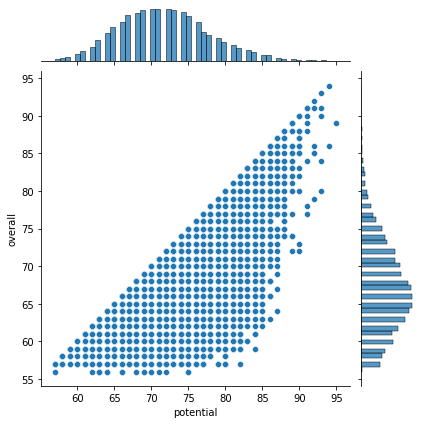

In [47]:
sns.jointplot(x='potential', y='overall', data=df, kind='scatter')

The graph above is a scatterplot of potential against overall which has a positive linear relationship. By looking at the graph the average potential is 72 and the average overall is 67. This came as a surprise to me as I thought the overall would be slightly higher or equal to the average potential but since it is lower it flasifies my intial hypothesis amd it shows that some players can have a higher potential but still have less overalls. The minimum value for potential is 57 while the highest being 95. The lowest value for Overall is 56 and the highest is 94. 

In [44]:
df1.describe(include= 'object').T

,count,unique,top,freq
Player Name,17981,17701,Paulinho,8
Position,17981,232,CB,2296
Category,17981,3,Bronze,12984


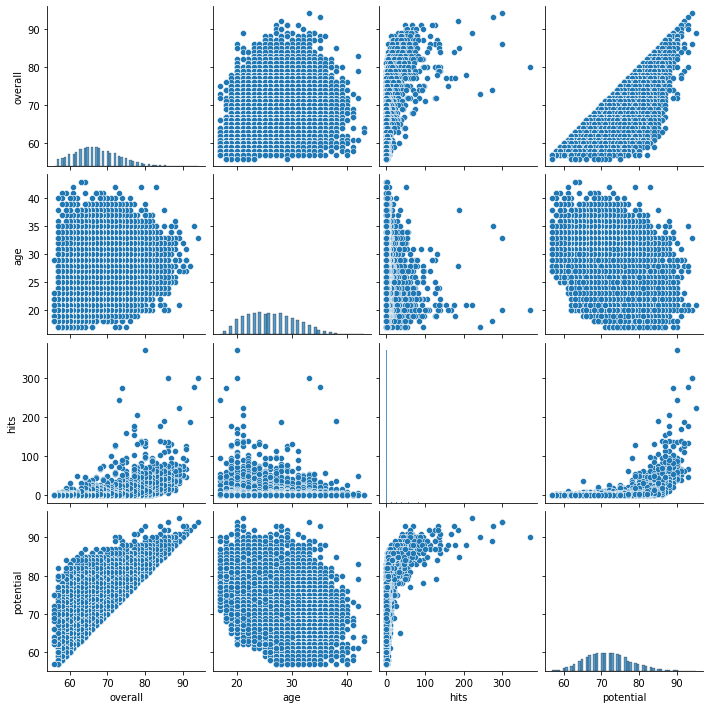

In [57]:
sns.pairplot(df1)

The pairplot above shows the relationship between all the 4 variables and I chose the relationship between the potential and overall variables as they have a positive linear trend making it easier to analyze and understand. The rest of the variables and the relationship between them did not make much sense to me as they were very random and hard to analyse 

<AxesSubplot:title={'center':'Potential against overall'}, xlabel='Potential', ylabel='Overall'>

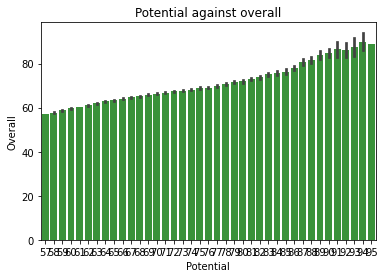

In [62]:
x = sns.barplot(x="potential", y="overall", data=df1, color="tab:green")
x.set_title("Potential against overall")
x.set_xlabel("Potential")
x.set_ylabel("Overall")
x

In the graph above we can clearly see a general trend that with potential the overall of a player increases as well but the graph has minor fluctuations in it at points where some players have more overall ratings with less potential comapred to some other players.

In my analysis I chose the variables potential and overall to analyse and find a relationship in. To decide these two varibales out of the 9 varibales I first decided to make a correltation table which clearly shows me the relationship between each numerical varibale whether they are positively or negatively associated to each other and how strong of a relationship they have. My hypothesis before testing this was that the higher the potential the higher will be the overall of the player's. This is certainly not the case as there are some players with very high potential but less overall and there are players with less potential and higher overalls. Most of the players have a potential in the range of 65 to 80 and the overall for most players lies in the rnage between 60 to 70. The average overall is 67 and the average potential is 71. 


The dataset has got no null values and I decided to remove all the unecessary variables which were not required for this analysis. I decided to remove player_id , nationality and team columns as they were not required in my analysis. I did however add a varibale called as rating which classifies all the players in gold, bronze and silver classes as this helps the target audience to know the value of a player and can be a good insight when trading the game players with other users in the game. 